# Graph 4: MultiConditional Graph


In [20]:
# imports
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [21]:
# StateSchema
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    result: int

In [22]:
# nodes (do not forget to add docstrings in nodes)
def addition_node(state: AgentState) -> AgentState:
    """
    Adds two numbers stored in the state.
    """
    state['result'] = state['num1'] + state['num2']
    return state

def subtraction_node(state: AgentState) -> AgentState:
    """
    Subtracts num2 from num1 stored in the state.
    """
    state['result'] = state['num1'] - state['num2']
    return state

def multiplication_node(state: AgentState) -> AgentState:
    """
    Multiplies two numbers stored in the state.
    """
    state['result'] = state['num1'] * state['num2']
    return state

def invalid_operation_node(state: AgentState) -> AgentState:
    """
    Handles invalid operations by setting result to None.
    """
    state['result'] = "AgentState: Invalid operation. Only '+', '-', and '*' are supported."
    return state

In [23]:
# additional nodes for routing
def router(state: AgentState) -> AgentState:
    """
    Routes the state to the appropriate operation node based on the 'operation' field.
    """
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"
    elif state['operation'] == '*':
        return "multiplication_operation"
    else:
        return "invalid_operation"

In [24]:
# StateGraph
graph = StateGraph(AgentState) 

graph.add_node("addition_node", addition_node)
graph.add_node("subtraction_node", subtraction_node)
graph.add_node("multiplication_node", multiplication_node)
graph.add_node("invalid_operation_node", invalid_operation_node)
graph.add_node("router", lambda state:state) # pass-through node for routing

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    router,
    # "edge":"node"
    {
        "addition_operation": "addition_node",
        "subtraction_operation": "subtraction_node",
        "multiplication_operation": "multiplication_node",
        "invalid_operation": "invalid_operation_node"
    }
)

graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)
graph.add_edge("multiplication_node", END)
graph.add_edge("invalid_operation_node", END)

app = graph.compile()

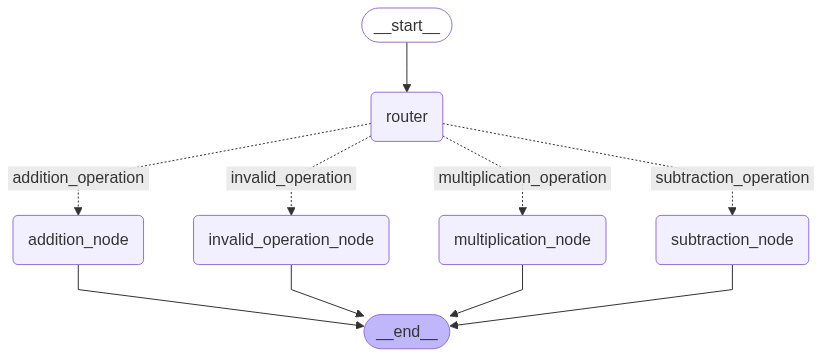

In [25]:
# Visualize the graph
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
state_eg = AgentState(
    num1=10,
    num2=5,
    operation='*'
)
# Run the app with an example state
result = app.invoke(state_eg)
result['result']  # This will give you the result of the operation

50

In [27]:
state = {
    "num1": 10,
    "num2": 5,
    "operation": "5"
}
# Run the app with the state
result = app.invoke(state)
result['result']  # This will give you the result of the operation

"AgentState: Invalid operation. Only '+', '-', and '*' are supported."

## Exercise:

In [28]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [29]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    result1: int
    num3: int
    num4: int
    operation2: str
    result2: int

In [31]:
def addition_node_1(state: AgentState) -> AgentState:
    """
    Adds two numbers stored in the state.
    """
    state['result1'] = state['num1'] + state['num2']
    return state

def subtraction_node_1(state: AgentState) -> AgentState:
    """
    Subtracts num2 from num1 stored in the state.
    """
    state['result1'] = state['num1'] - state['num2']
    return state

def addition_node_2(state: AgentState) -> AgentState:
    """
    Adds two numbers stored in the state.
    """
    state['result2'] = state['num3'] + state['num4']
    return state

def subtraction_node_2(state: AgentState) -> AgentState:
    """
    Subtracts num4 from num3 stored in the state.
    """
    state['result2'] = state['num3'] - state['num4']
    return state

In [32]:
graph = StateGraph(AgentState)
graph.add_node("addition_node_1", addition_node_1)
graph.add_node("subtraction_node_1", subtraction_node_1)
graph.add_node("addition_node_2", addition_node_2)
graph.add_node("subtraction_node_2", subtraction_node_2)
graph.add_node("router_1", lambda state: state)  # pass-through node for routing
graph.add_node("router_2", lambda state: state)  # pass-through node for routing

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    lambda state: "addition_operation_1" if state['operation1'] == '+' else "subtraction_operation_1",
    {
        "addition_operation_1": "addition_node_1",
        "subtraction_operation_1": "subtraction_node_1"
    }
)
graph.add_edge("addition_node_1", "router_2")
graph.add_edge("subtraction_node_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    lambda state: "addition_operation_2" if state['operation2'] == '+' else "subtraction_operation_2",
    {
        "addition_operation_2": "addition_node_2",
        "subtraction_operation_2": "subtraction_node_2"
    }
)
graph.add_edge("addition_node_2", END)
graph.add_edge("subtraction_node_2", END)
app = graph.compile()


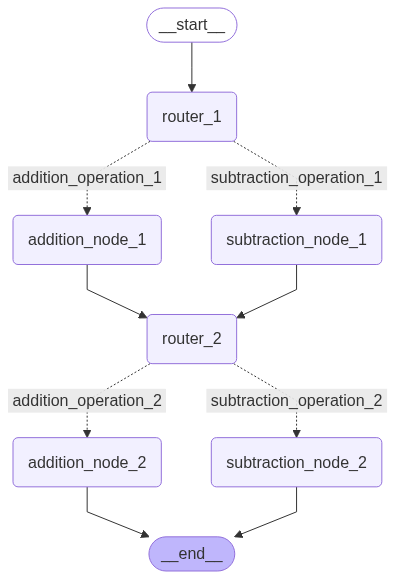

In [33]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
# example state
state_example = AgentState(
    num1=10,
    num2=5,
    operation1='+',
    num3=20,
    num4=10,
    operation2='-'
)

result = app.invoke(state_example)
result

{'num1': 10,
 'num2': 5,
 'operation1': '+',
 'result1': 15,
 'num3': 20,
 'num4': 10,
 'operation2': '-',
 'result2': 10}